<a href="https://colab.research.google.com/github/Veena-Prasasya/CreativeAppIdeas/blob/main/Prasasya_grp18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

# GENERATING DATA POINTS

In [2]:
logReg = True #Make it true for linear Regression
D = np.array([[-10,-10],[-8,-2],[-6,-12],[-4,-4],[10,10],[8,2],[6,12],[4,4]])
x = D[:,0]
if logReg:
  Y = np.array([-1,-1,-1,-1,1,1,1,1]) #Log Regression
  X = np.hstack((np.ones((Y.size,1)),D)) #Log Regression
else:
  Y = D[:,1]
  X = np.hstack((np.ones((Y.size,1)),np.expand_dims(D[:, 0], axis=1)))
print(Y, '\n', X)

[-1 -1 -1 -1  1  1  1  1] 
 [[  1. -10. -10.]
 [  1.  -8.  -2.]
 [  1.  -6. -12.]
 [  1.  -4.  -4.]
 [  1.  10.  10.]
 [  1.   8.   2.]
 [  1.   6.  12.]
 [  1.   4.   4.]]


Once you get the line (the parameter m and c. Plot the points on the line along with the data. For this, generate many x values between the min x value and max value of the dataset and compute y values. Then compute the points and plot the points along with dataset. Note that if the slope of the line is > 1, you may need to do it the other way...i.e., fix y and find x

In [3]:
def plotDataAndModel(X, LineParams):
  x = np.arange(np.min(X[:,1]),np.max(X[:,1]),0.01);
  (c,a,b) = LineParams
  y = -(a*x + c)/b
  plt.scatter(D[:,0],D[:,1], s=75)
  plt.plot(x, y, '-',color='r')

Lets use Gradient Descent. We define the cost function (which we want to minimize), the MSE. Note the form of the predicted output which Theta'*x (which is mx+c if you are looking for a line) for Linear Regression and 1/(1 + e^(-Theta'*x)) for Logistic regression

In [4]:
def hThetaX(theta, x):
    pred = np.dot(x, theta)
    if logReg:
      return 1 / (1 + np.exp(-pred)) #Logistic regression
    else:
      return pred #Linear regression

In [5]:
def cost_function(X, Y, theta):
    if logReg:
      J = -(1 / len(Y)) * np.sum(Y * np.log(hThetaX(theta, X)) + (1 - Y) * np.log(1 - hThetaX(theta, X)))
    else:
      J = np.sum((X.dot(theta)-Y)**2)/len(Y)
    return J

Now lets define the gradeint descent update procedure. We are computing the same gradient derived in our lecture and trying to update the parameters. Note that we are exhaustively trying this for the number of 'iterations' specified. You can actually check the convergence status by evaluating say the norm of the gradient (should be very close to zero near convergence) for an early exit. Also, note that since the function is convex, cost should not increase over the subsequent iterations, if the chosen learning rate is in good range. If cost increses, cut down the learning rate. Once you are in a good alpha, you will surely converge, irrespective of the chosen alpha.

In [6]:
def gradient_descent(X, Y, theta, alpha, iterations):
    n = len(Y)
    cost_history = [0] * iterations
    for iteration in range(iterations):
        y_pred =  hThetaX(theta, X)
        loss = y_pred-Y
        gradient = X.T.dot(loss)*(2/n)
        theta = theta - alpha*gradient
        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost
        if(cost>cost_history[iteration-1]):
            alpha = alpha*0.1
    return theta, cost_history

Trying to fit the given data using a line. The learning rate chosen is 0.01 and max iterations chosen is 100

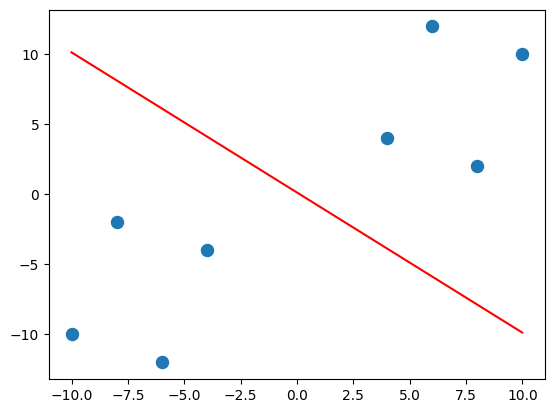

In [7]:
if not logReg:
  theta = np.array([0, 0])
  (theta, cost) = gradient_descent(X,Y,theta,0.01,100)
  theta=np.append(theta, -1) #y = mx + c
else:
  theta = np.array([0, 0, 0])
  (theta, cost) = gradient_descent(X,Y,theta,0.01,100)
plotDataAndModel(X, theta)

Let's use builtin function for Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y), reg.coef_)
theta = np.append(reg.coef_, -1)
plotDataAndModel(X, theta)

0.9158878504672897 [0.         0.10903427 0.02180685]


ValueError: ignored

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,Y)
y_pred=logreg.predict(X)
print(y_pred)

[-1 -1 -1 -1  1  1  1  1]


Note that you should validate the results on a separate set of samples which are not used in training (Validation Set)

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(Y, y_pred))
print("Precision:",metrics.precision_score(Y, y_pred))
print("Recall:",metrics.recall_score(Y, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# LETS BUILT A MODEL USING A REAL DATA

In [39]:
from sklearn.datasets import load_iris

In [41]:
data = load_iris()

In [42]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# LETS CREATE A DATAFRAME

In [14]:
import pandas as pd

In [15]:
data_f = pd.DataFrame(columns=list(data['feature_names']),data= data['data'])

In [16]:
data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
data_f.shape

(150, 4)

In [18]:
data_f['target'] = data['target']

In [19]:
data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

malignancy --> 1  and Benignency --> 0

In [21]:
data_f.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
data_f.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

# SPLITTING INTO TEST TRAIN

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(data_f.drop('target',axis=1),data_f['target'],test_size=0.3)

# FITTING INTO THE MODEL

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# ANALYZING THE MODEL

## CONFUSION MATRIX

![image.png](attachment:image.png)

Accuracy = 68 %
Recall = 100 %
Precision = 100 %


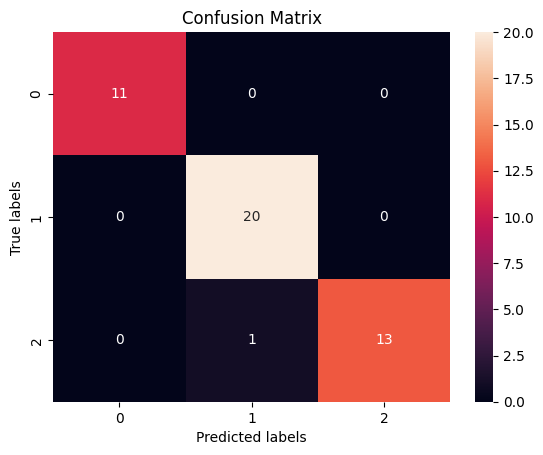

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,model.predict(X_test))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax)
print(f"Accuracy = {int((confusion_matrix[0][0]+confusion_matrix[1][1])*100/confusion_matrix.sum())} %")
print(f"Recall = {int(confusion_matrix[0][0]*100/confusion_matrix[0,:].sum())} %")
print(f"Precision = {int(confusion_matrix[0][0]*100/confusion_matrix[:,0].sum())} %")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

Activity: Execute and Understand the above code. Relate it to whatever you had learned in Theory session.
Now you go through the tutorial at https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python which uses the diabates dataset. How will you extend it for multi class. Now you build a notebook for classifying fischer Iris flowers, taking 70% of samples from each class for training and report accuracy on the remaining 30% data

In [27]:
from sklearn.datasets import load_iris

In [28]:
data_iris = load_iris()

In [29]:
data_iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
data_iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
data_iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3